In [19]:
import numpy as np 
import matplotlib
import pandas as pd
from __future__ import division
from scipy import interpolate
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import spectral.io.envi as envi
from spectral import *
import os
import re
import math
import PIL
from scipy import signal
from scipy import ndimage
from scipy import spatial
from scipy import stats
from scipy import interpolate
import traceback
import sys
import pickle
import warnings
from pprint import pprint
import lmfit

In [20]:
import peakutils
import matplotlib.pyplot as plt

In [21]:

from pysptools import spectro as sp


In [22]:
from scipy.interpolate import interp1d


In [23]:
headerFileAddress=r'/home/nisergeo/Desktop/Data/M3G20090720T043741_V01_RFL_test.hdr'
currentObservationHeader=envi.open(headerFileAddress)
currentObservationImage=currentObservationHeader.open_memmap()
from scipy.interpolate import interp1d
print(dir(currentObservationHeader))
currentObservationArray=np.array(currentObservationHeader.open_memmap())
print(currentObservationArray.shape)
datacube=currentObservationArray

wavelengthList=[
  540.840027,  580.760010,  620.690002,  660.609985,  700.539978,  730.479980,
  750.440002,  770.400024,  790.369995,  810.330017,  830.289978,  850.250000,
  870.210022,  890.169983,  910.140015,  930.099976,  950.059998,  970.020020,
  989.979980, 1009.950012, 1029.910034, 1049.869995, 1069.829956, 1089.790039,
  1109.760010, 1129.719971, 1149.680054, 1169.640015, 1189.599976, 1209.569946,
  1229.530029, 1249.489990, 1269.449951, 1289.410034, 1309.380005, 1329.339966,
  1349.300049, 1369.260010, 1389.219971, 1409.189941, 1429.150024, 1449.109985,
  1469.069946, 1489.030029, 1508.989990, 1528.959961, 1548.920044, 1578.859985,
  1618.790039, 1658.709961, 1698.630005, 1738.560059, 1778.479980, 1818.400024,
  1858.329956, 1898.250000, 1938.180054, 1978.099976, 2018.020020, 2057.949951,
  2097.870117, 2137.800049, 2177.719971, 2217.639893, 2257.570068, 2297.489990,
  2337.419922, 2377.340088, 2417.260010, 2457.189941, 2497.110107, 2537.030029,
  2576.959961, 2616.879883, 2656.810059, 2696.729980, 2736.649902, 2776.580078,
  2816.500000, 2856.429932, 2896.350098, 2936.270020, 2976.199951]
wavelengthList=np.array(wavelengthList)

['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_disable_memmap', '_fix_negative_indices', '_memmap', '_open_memmap', 'asarray', 'bands', 'byte_order', 'dtype', 'fid', 'filename', 'interleave', 'load', 'metadata', 'nbands', 'ncols', 'nrows', 'offset', 'open_memmap', 'params', 'read_band', 'read_bands', 'read_datum', 'read_pixel', 'read_subimage', 'read_subregion', 'sample_size', 'scale_factor', 'set_params', 'shape', 'swap', 'transform', 'using_memmap']
(2501, 304, 83)


In [24]:
print(currentObservationHeader.read_pixel)

<bound method BilFile.read_pixel of 	Data Source:   '/home/nisergeo/Desktop/Data/M3G20090720T043741_V01_RFL_test'
	# Rows:           2501
	# Samples:         304
	# Bands:            83
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32>


In [25]:
image=open_image(headerFileAddress)


In [26]:
type(image)

spectral.io.bilfile.BilFile

In [27]:
datacube=ndimage.uniform_filter(datacube,size=3)

In [28]:
type(datacube)

numpy.ndarray

In [409]:
# base=[]
# for i in range(0):
#     if i%100==0:
#         print(f"processing row number{i}")
#     for j in range(0):
        
#         CR = sp.convex_hull_removal(datacube[i,j,:],wavelengthList)
#         f =(interp1d(wavelengthList, CR[0]))
#         inter=np.arange(550,2505,5)
#         final=f(np.array(inter))
        
#         plt.plot(inter,final)
        
# plt.show()

In [120]:
test=[]

for i in range(np.shape(datacube)[0]):
    if i%100==0:  
        print(f"processing row number{i}")
    for j in range(np.shape(datacube)[1]):
       # if j%100==0:  
            #print(f"processing column number{j}")
        CR = sp.convex_hull_removal(datacube[i,j,:],wavelengthList)
        f =(interp1d(wavelengthList, CR[0]))
        inter=np.arange(550,2505,5)
        final=f(np.array(inter))
        test.append(final)


processing row number0
processing row number100
processing row number200
processing row number300
processing row number400
processing row number500
processing row number600
processing row number700
processing row number800
processing row number900
processing row number1000
processing row number1100
processing row number1200
processing row number1300
processing row number1400
processing row number1500
processing row number1600
processing row number1700
processing row number1800
processing row number1900
processing row number2000
processing row number2100
processing row number2200
processing row number2300
processing row number2400
processing row number2500


In [71]:
base=[]

for i in range(np.shape(datacube)[0]):
    if i%100==0:  
        print(f"processing row number{i}")
    for j in range(np.shape(datacube)[1]):
        #if j%100==0:  
            #print(f"processing column number{j}")
        CR = sp.convex_hull_removal(datacube[i,j,:],wavelengthList)
        f =(interp1d(wavelengthList, CR[0]))
        inter=np.arange(550,2505,5)
        final=f(np.array(inter))
        feature.append(final)


processing row number0
processing row number100
processing row number200
processing row number300
processing row number400
processing row number500
processing row number600
processing row number700
processing row number800
processing row number900
processing row number1000
processing row number1100
processing row number1200
processing row number1300
processing row number1400
processing row number1500
processing row number1600
processing row number1700
processing row number1800
processing row number1900
processing row number2000
processing row number2100
processing row number2200
processing row number2300
processing row number2400
processing row number2500


In [133]:
hyp=np.array(base)
hyp.shape

(760304, 391)

In [72]:
np.asarray(feature).shape

(760530, 391)

In [32]:
# inter=np.arange(550,2505,5)
# final=f(np.array(inter))
# print(final)
# print(inter)

In [89]:
# base=len(inter)

In [33]:


# This function take a dataframe
# as a parameter and returning list
# of column names whose contents 
# are duplicates.
def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [34]:
df=pd.read_excel("15_Master_Mixtures_Part_1.xlsx",header=[3])
df=df[df['Wavelength (nm)'] % 5==0]
df.dropna(how='all', axis=1, inplace=True)

duplicateColNames = getDuplicateColumns(df)
  
print('Duplicate Columns are :')
for column in duplicateColNames :
    print('Column Name : ', column)
    print(df.columns.get_loc(column))    
df.drop(df.columns[[42, 30,54,15 ]], axis = 1, inplace = True)
#df.drop(df.columns[[54 ]], axis = 1, inplace = True)
duplicateColNames = getDuplicateColumns(df)
  
print('Duplicate Columns are :')
for column in duplicateColNames :
    print('Column Name : ', column)
index_name = df[ df['Wavelength (nm)'] <550 ].index
df.drop(index_name, inplace = True)
print(df)

Duplicate Columns are :
Column Name :  Wavelength (nm).3
54
Column Name :  dec1406.017.1
47
Column Name :  dec1406.021.1
51
Column Name :  Wavelength (nm).2
42
Column Name :  dec1406.018.1
48
Column Name :  dec1406.013.1
43
Column Name :  Wavelength
15
Column Name :  Wavelength (nm).1
30
Column Name :  dec1406.014.1
44
Column Name :  dec1406.015.1
45
Column Name :  dec1406.016.1
46
Column Name :  dec1406.019.1
49
Column Name :  dec1406.020.1
50
Column Name :  dec1406.022.1
52
Column Name :  dec1406.023.1
53
Duplicate Columns are :
Column Name :  dec1406.017.1
Column Name :  dec1406.021.1
Column Name :  dec1406.018.1
Column Name :  dec1406.013.1
Column Name :  dec1406.016.1
Column Name :  dec1406.015.1
Column Name :  dec1406.014.1
Column Name :  dec1406.019.1
Column Name :  dec1406.023.1
Column Name :  dec1406.020.1
Column Name :  dec1406.022.1
      Wavelength (nm)  sep0407.001  sep0407.002  sep0407.003  sep0407.004  \
200               550     0.518902     0.509121     0.508915     0.

In [35]:
df1=pd.read_excel("orthopyroxene.xlsx",header=[2],usecols = "A:S")
df1.dropna(how='all', axis=1, inplace=True)
df1=df1[df1['Sample ID'] % 5==0]
index_name = df1[ df1['Sample ID'] <550 ].index
df1.drop(index_name, inplace = True)
print(df1)

      Sample ID    PYX003  PYX003.1    PYX023  PYX023.1    PYX032  PYX032.1  \
200         550  0.250643  0.147692  0.492883  0.323050  0.202696  0.123732   
205         555  0.252926  0.149176  0.494576  0.325177  0.205125  0.125352   
210         560  0.255258  0.150684  0.496135  0.327043  0.207431  0.126885   
215         565  0.257364  0.152067  0.497038  0.328028  0.209416  0.128119   
220         570  0.259418  0.153360  0.497616  0.328397  0.211158  0.129195   
...         ...       ...       ...       ...       ...       ...       ...   
2130       2480  0.484076  0.380070  0.495032  0.349714  0.285508  0.238969   
2135       2485  0.485441  0.380944  0.494315  0.349372  0.285671  0.240008   
2140       2490  0.485872  0.381656  0.493389  0.348601  0.286378  0.241476   
2145       2495  0.487431  0.383167  0.493673  0.347348  0.287236  0.243293   
2150       2500  0.488089  0.383652  0.493709  0.347179  0.288217  0.243740   

        PYX042  PYX042.1    PYX108  PYX108.1    PYX

In [36]:
df_cl=pd.read_excel("Clinopyroxene.xlsx",header=[2],usecols = "A:S")
df_cl.dropna(how='all', axis=1, inplace=True)
df_cl=df_cl[df_cl['Sample ID'] % 5==0]
index_name = df_cl[ df_cl['Sample ID'] <550 ].index
df_cl.drop(index_name, inplace = True)
print(df1)

      Sample ID    PYX003  PYX003.1    PYX023  PYX023.1    PYX032  PYX032.1  \
200         550  0.250643  0.147692  0.492883  0.323050  0.202696  0.123732   
205         555  0.252926  0.149176  0.494576  0.325177  0.205125  0.125352   
210         560  0.255258  0.150684  0.496135  0.327043  0.207431  0.126885   
215         565  0.257364  0.152067  0.497038  0.328028  0.209416  0.128119   
220         570  0.259418  0.153360  0.497616  0.328397  0.211158  0.129195   
...         ...       ...       ...       ...       ...       ...       ...   
2130       2480  0.484076  0.380070  0.495032  0.349714  0.285508  0.238969   
2135       2485  0.485441  0.380944  0.494315  0.349372  0.285671  0.240008   
2140       2490  0.485872  0.381656  0.493389  0.348601  0.286378  0.241476   
2145       2495  0.487431  0.383167  0.493673  0.347348  0.287236  0.243293   
2150       2500  0.488089  0.383652  0.493709  0.347179  0.288217  0.243740   

        PYX042  PYX042.1    PYX108  PYX108.1    PYX

In [37]:
df2=pd.read_excel("2_2_Master_Olivines.xlsx",header=[3],usecols = "A,C:S")
df2.dropna(how='all',axis=1,inplace=True)
index_names = df2[ df2['wavelength (nm)'] > 2500 ].index
df2.drop(index_names, inplace = True)
print(df2)
index_name = df2[ df2['wavelength (nm)'] <550 ].index
df2.drop(index_name, inplace = True)
print(df2)

     wavelength (nm)    OLV002  OLV002.1    OLV003  OLV003.1  OLV003.2  \
0                300  0.141179  0.068696  0.225242  0.082596  0.247412   
1                305  0.150881  0.071555  0.236697  0.085956  0.251261   
2                310  0.157884  0.075518  0.252683  0.093252  0.264559   
3                315  0.173051  0.080394  0.271370  0.103220  0.279718   
4                320  0.188458  0.089754  0.297143  0.115948  0.302189   
..               ...       ...       ...       ...       ...       ...   
436             2480  0.747488  0.778521  0.791292  0.761921  0.696385   
437             2485  0.747556  0.778615  0.791516  0.760329  0.694771   
438             2490  0.747877  0.779214  0.792605  0.760035  0.694832   
439             2495  0.748427  0.780564  0.792060  0.758931  0.694031   
440             2500  0.748935  0.780635  0.792420  0.759391  0.694564   

       OLV005  OLV005.1    OLV007    OLV008    OLV009  OLV009.1    OLV010  \
0    0.232673  0.118157  0.337626 

In [38]:
df4 = pd.read_excel("15_Master_Mixtures_Part_1.xlsx", sheet_name="15_2_Mixtures",header=[3],usecols = "A:L")
df4=df4[df4['Sample ID'] % 5==0]
index_name_p1 = df4[ df4['Sample ID'] <550 ].index
df4.drop(index_name_p1, inplace = True)
print(df4)

      Sample ID  pomix1001  pomix1002  pomix1003  pomix1004  pomix1005  \
200         550   0.600311   0.591994   0.590859   0.586653   0.572985   
205         555   0.602387   0.594216   0.593305   0.589332   0.575879   
210         560   0.603824   0.595930   0.595259   0.591760   0.578704   
215         565   0.604761   0.597079   0.596673   0.593295   0.580480   
220         570   0.605887   0.598289   0.597984   0.594778   0.582069   
...         ...        ...        ...        ...        ...        ...   
2130       2480   0.622465   0.611169   0.609519   0.602812   0.583693   
2135       2485   0.622840   0.612001   0.610763   0.604860   0.584018   
2140       2490   0.623309   0.612653   0.611479   0.605496   0.584183   
2145       2495   0.624294   0.612794   0.611911   0.605801   0.585602   
2150       2500   0.625140   0.613496   0.612801   0.607113   0.586328   

      pomix1006  pomix1007  pomix1008  pomix1009  pomix1010  pomix1011  
200    0.562956   0.544941   0.536644 

In [40]:
dfp=pd.read_excel("Plagioclase.xlsx",header=[1])
dfp.dropna(how='all', axis=1, inplace=True)

dfp=dfp[dfp['Wavelength (nm)']%5==0]
index_names_p = dfp[ dfp['Wavelength (nm)'] > 2500 ].index
dfp.drop(index_names_p, inplace = True)
index_name_p1 = dfp[ dfp['Wavelength (nm)'] <550 ].index
dfp.drop(index_name_p1, inplace = True)
# df.drop(df.columns["Unnamed: 26"], axis = 1, inplace = True)

dfp

,Wavelength (nm),capl29,capl30,capl31,capl32,capl33,capl34,capl35,capl36,capl37,...,capl44,capl45,capl46,capl47,capl48,capl49,capl51,capl52,capl50,capl53
50,550,0.626842,0.666343,0.768891,0.706051,0.777704,0.770815,0.423558,0.700319,0.516246,...,0.705873,0.745956,0.728895,0.785949,0.747571,0.807854,0.731031,0.64367,0.598444,0.72783
51,555,0.626510,0.666667,0.769286,0.706947,0.779176,0.770669,0.429608,0.701995,0.518109,...,0.706650,0.747361,0.730617,0.787963,0.752219,0.808481,0.735319,0.64326,0.599804,0.72865
52,560,0.628544,0.668753,0.769675,0.707543,0.778465,0.771476,0.436853,0.703329,0.519816,...,0.706667,0.748040,0.734428,0.791327,0.753331,0.808568,0.734555,0.64485,0.599401,0.72837
53,565,0.628772,0.669064,0.769869,0.708584,0.780090,0.770832,0.443719,0.703852,0.521117,...,0.706990,0.749299,0.735346,0.793379,0.758048,0.809783,0.737782,0.64607,0.601028,0.72835
54,570,0.630270,0.671085,0.770363,0.708544,0.780110,0.771562,0.451709,0.705362,0.523376,...,0.707565,0.751028,0.738978,0.796578,0.760111,0.809829,0.736813,0.64700,0.600655,0.72879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2480,0.630297,0.725125,0.772524,0.717199,0.753267,0.778542,0.607678,0.699019,0.642848,...,0.662343,0.769629,0.777970,0.800651,0.810525,0.727431,0.776256,0.65630,0.642983,0.69858
437,2485,0.627961,0.723411,0.773030,0.715095,0.753580,0.773948,0.607291,0.698749,0.643566,...,0.662767,0.768307,0.776975,0.800008,0.810287,0.727838,0.776395,0.65412,0.642953,0.69548
438,2490,0.627254,0.725084,0.773313,0.715958,0.755770,0.772218,0.607754,0.698678,0.645586,...,0.667220,0.768648,0.777759,0.802723,0.809921,0.730751,0.776413,0.65286,0.644587,0.69482
439,2495,0.626199,0.725739,0.773655,0.714517,0.753480,0.771378,0.608194,0.696735,0.645563,...,0.669311,0.768795,0.780643,0.802702,0.809384,0.733230,0.776126,0.65371,0.645547,0.69538


In [41]:
dfl=pd.read_excel("ilmenite.xlsx",header=[1])
dfl.dropna(how='all', axis=1, inplace=True)

dfl=dfl[dfl['Sample ID']%5==0]
index_names_l = dfl[ dfl['Sample ID'] > 2500 ].index
dfl.drop(index_names_l, inplace = True)
index_name_l = dfl[ dfl['Sample ID'] <550 ].index
dfl.drop(index_name_l, inplace = True)
print(dfl)

      Sample ID    ILM102  ILM102.1  ILM102.2  ILM102.3  ILM102.4  ILM102.5  \
200         550  0.056610  0.055326  0.055968  0.072556  0.070803  0.071680   
205         555  0.056636  0.055330  0.055983  0.072641  0.070884  0.071763   
210         560  0.056699  0.055398  0.056048  0.072737  0.070993  0.071865   
215         565  0.056700  0.055403  0.056051  0.072787  0.071050  0.071919   
220         570  0.056722  0.055407  0.056065  0.072858  0.071113  0.071985   
...         ...       ...       ...       ...       ...       ...       ...   
2130       2480  0.070545  0.069159  0.069852  0.075049  0.073599  0.074324   
2135       2485  0.070341  0.068988  0.069665  0.075172  0.073369  0.074271   
2140       2490  0.070949  0.069347  0.070148  0.074149  0.073135  0.073642   
2145       2495  0.071321  0.069853  0.070587  0.074975  0.073280  0.074128   
2150       2500  0.070948  0.069445  0.070196  0.075657  0.073583  0.074620   

      ILM102.6  ILM102.7  ILM102.8  ...    ILM153  

In [42]:
df_sp=pd.read_excel("Spinels.xlsx",header=[0])
df_sp=df_sp[df_sp['Sample ID']%5==0]
index_names_sp = df_sp[ df_sp['Sample ID'] > 2500 ].index
df_sp.drop(index_names_sp, inplace = True)
index_name_sp = df_sp[ df_sp['Sample ID'] <550 ].index
df_sp.drop(index_name_sp, inplace = True)#delete nan coulmn in data feame
print(df_sp)

     Sample ID    HER101    SPI112    SPI114    SPI115    SPI116    SPI117  \
50         550  0.088000  0.058700  0.089028  0.189884  0.571737  0.636783   
51         555  0.088256  0.058929  0.088863  0.189055  0.571362  0.638764   
52         560  0.088630  0.059253  0.089167  0.188937  0.564103  0.646291   
53         565  0.088950  0.059214  0.089353  0.188806  0.557176  0.653476   
54         570  0.088971  0.059357  0.089430  0.188848  0.549602  0.661446   
..         ...       ...       ...       ...       ...       ...       ...   
436       2480  0.118822  0.060136  0.100650  0.172788  0.310307  0.169887   
437       2485  0.118850  0.059983  0.100759  0.172926  0.310534  0.169941   
438       2490  0.119190  0.060318  0.100663  0.173024  0.309824  0.169809   
439       2495  0.119076  0.060352  0.101078  0.173121  0.309785  0.169659   
440       2500  0.119660  0.060361  0.100905  0.173453  0.310284  0.169623   

       SPI118    SPI119    SPI121  ...  SPI118.1  SPI119.1  SPI

In [43]:
dfol_m=pd.read_excel("cers89.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]

index_names_m1 = dfol_m[ dfol_m['Wavelength(micron)'] > 2.500 ].index
dfol_m.drop(index_names_m1, inplace = True)
index_name_m1 = dfol_m[ dfol_m['Wavelength(micron)'] <0.550 ].index
dfol_m.drop(index_name_m1, inplace = True)
print(dfol_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
50                0.550      0.06986        0.06698        0.06442   
51                0.555      0.07117        0.06776        0.06557   
52                0.560      0.07209        0.06831        0.06623   
53                0.565      0.07263        0.06864        0.06655   
54                0.570      0.07317        0.06899        0.06703   
..                  ...          ...            ...            ...   
436               2.480      0.15915        0.11395        0.16390   
437               2.485      0.15870        0.11368        0.16385   
438               2.490      0.15874        0.11368        0.16356   
439               2.495      0.15809        0.11351        0.16302   
440               2.500      0.15795        0.11344        0.16284   

     Reflectance.3  Reflectance.4  
50         0.05440        0.06103  
51         0.05499        0.06178  
52         0.05535        0.06216  
53         0.05

In [44]:
df2_m=pd.read_excel("c1xs06.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]

index_names_m2 = df2_m[ df2_m['Wavelength(micron)'] > 2.500 ].index
df2_m.drop(index_names_m2, inplace = True)
index_name_m2 = df2_m[ df2_m['Wavelength(micron)'] <0.550 ].index
df2_m.drop(index_name_m2, inplace = True)
print(df2_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
50                0.550      0.22885        0.37800        0.44387   
51                0.555      0.23033        0.37792        0.44617   
52                0.560      0.23184        0.37987        0.44731   
53                0.565      0.23155        0.38139        0.44891   
54                0.570      0.23092        0.38302        0.44937   
..                  ...          ...            ...            ...   
436               2.480      0.32621        0.44452        0.51550   
437               2.485      0.32672        0.44555        0.51687   
438               2.490      0.32778        0.44672        0.51746   
439               2.495      0.32862        0.44722        0.51853   
440               2.500      0.32933        0.44821        0.51977   

     Reflectance.3  Reflectance.4  Reflectance.5  Reflectance.6  \
50         0.19224        0.30296        0.42301        0.15848   
51         0.19310       

In [45]:
df3_m=pd.read_excel("c1xs15.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]

index_names_m3 = df3_m[ df3_m['Wavelength(micron)'] > 2.500 ].index
df3_m.drop(index_names_m3, inplace = True)
index_name_m3 = df3_m[ df3_m['Wavelength(micron)'] <0.550 ].index
df3_m.drop(index_name_m3, inplace = True)
print(df3_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2
50                0.550      0.33910        0.36936        0.27982
51                0.555      0.33982        0.36975        0.28098
52                0.560      0.34046        0.37073        0.28119
53                0.565      0.34104        0.37149        0.28127
54                0.570      0.34161        0.37097        0.28215
..                  ...          ...            ...            ...
436               2.480      0.42374        0.41890        0.35029
437               2.485      0.42472        0.41910        0.35043
438               2.490      0.42461        0.41920        0.35133
439               2.495      0.42604        0.41980        0.35169
440               2.500      0.42689        0.41997        0.35250

[391 rows x 4 columns]


In [46]:
df4_m=pd.read_excel("c1xt47.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]

index_names_m4 = df4_m[ df4_m['Wavelength(micron)'] > 2.500 ].index
df4_m.drop(index_names_m4, inplace = True)
index_name_m4 = df4_m[ df4_m['Wavelength(micron)'] <0.550 ].index
df4_m.drop(index_name_m4, inplace = True)
print(df4_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
50                0.550      0.68771        0.73981        0.77684   
51                0.555      0.69040        0.74027        0.77841   
52                0.560      0.69184        0.74230        0.77995   
53                0.565      0.69501        0.74497        0.78132   
54                0.570      0.69617        0.74505        0.78150   
..                  ...          ...            ...            ...   
436               2.480      0.74304        0.78778        0.76894   
437               2.485      0.74272        0.78718        0.76945   
438               2.490      0.74301        0.78649        0.76689   
439               2.495      0.74337        0.78563        0.76673   
440               2.500      0.74455        0.78684        0.76686   

     Reflectance.3  Reflectance.4  Reflectance.5  Reflectance.6  
50         0.73573        0.76399        0.73333        0.71267  
51         0.73725        0

In [47]:
df5_m=pd.read_excel("c1xt57.xlsx",header=[1])
# df_sp=df_sp[df_sp['Wavelength']%5==0]
df5_m = df5_m.dropna()

index_names_m5 = df5_m[ df5_m['Wavelength(micron)'] > 2.500 ].index
df5_m.drop(index_names_m5, inplace = True)
index_name_m5 = df5_m[ df5_m['Wavelength(micron)'] <0.550 ].index
df5_m.drop(index_name_m5, inplace = True)
print(df5_m)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
50                0.550      0.46188        0.46188        0.48294   
51                0.555      0.46355        0.46355        0.48631   
52                0.560      0.46701        0.46701        0.48901   
53                0.565      0.46594        0.46594        0.49123   
54                0.570      0.47085        0.47085        0.49311   
..                  ...          ...            ...            ...   
436               2.480      0.53975        0.53975        0.54641   
437               2.485      0.53998        0.53998        0.54720   
438               2.490      0.54065        0.54065        0.54768   
439               2.495      0.54078        0.54078        0.54775   
440               2.500      0.54009        0.54009        0.54854   

     Reflectance.3  
50         0.49505  
51         0.49796  
52         0.50060  
53         0.50315  
54         0.50478  
..             ...  
436        0

In [48]:
df_pl=pd.read_excel("relab_plag.xlsx",header=[1])
df_pl.dropna(how='all', axis=1, inplace=True)

index_names_m_pl = df_pl[ df_pl['Wavelength(micron)'] > 2.500].index
df_pl.drop(index_names_m_pl, inplace = True)
index_name_m_pl = df_pl[ df_pl['Wavelength(micron)'] <0.550 ].index
df_pl.drop(index_name_m_pl, inplace = True)
#df_pl=df_pl[(df_pl['Wavelength(micron)']*1000)%5==0]
#df_pl = df_pl.dropna()
print(df_pl)

     Wavelength(micron)  Reflectance  Reflectance.1  Reflectance.2  \
35                0.550      0.48777        0.74160        0.70158   
36                0.555      0.48964        0.74303        0.70257   
37                0.560      0.49199        0.74353        0.70352   
38                0.565      0.49404        0.74469        0.70460   
39                0.570      0.49537        0.74628        0.70587   
..                  ...          ...            ...            ...   
421               2.480      0.58753        0.75618        0.71025   
422               2.485      0.58788        0.75598        0.70854   
423               2.490      0.58813        0.75402        0.70702   
424               2.495      0.58921        0.75653        0.70915   
425               2.500      0.58920        0.75286        0.70545   

     Reflectance.3  Reflectance.4  Reflectance.5  Reflectance.6  Reflectance.7  
35         0.77923        0.65361        0.24673        0.71808        0.27850

In [56]:
minerals=[]
%matplotlib inline
from pysptools import spectro as sp
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
D=[66,3,5,5,5,2,6,6,5,5,]
len(D)

10

56


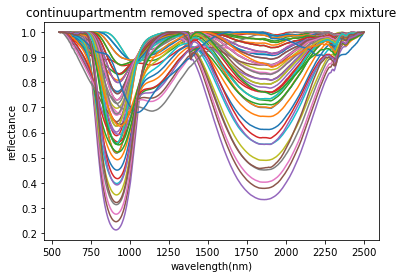

In [57]:
x=df.iloc[:,0].to_numpy()

for j in range(1,len(df.columns)):
    y=df.iloc[:,j].to_numpy()
    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuupartmentm removed spectra of opx and cpx mixture")
    minerals.append(CR[0])
print(len(minerals))

In [51]:
# x=df.iloc[:,0].to_numpy()

# for j in range(1,len(df.columns)):
#     y=df_cl.iloc[:,j].to_numpy()
#     CR = sp.convex_hull_removal(y,x)
#     plt.plot(x,CR[0])
#     plt.xlabel("wavelength(nm)")
#     plt.ylabel("reflectance")
#     plt.title("continuupartmentm removed spectra of opx and cpx mixture")
#     feature.append(CR[0])
# print(len(feature))

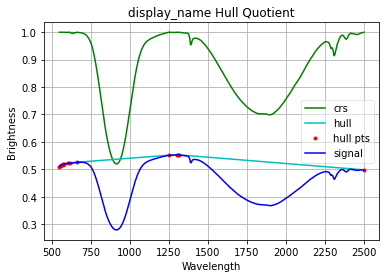

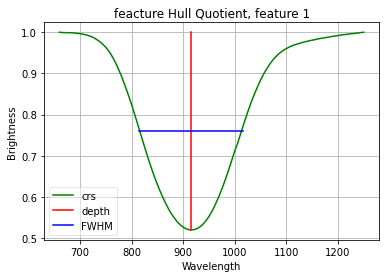

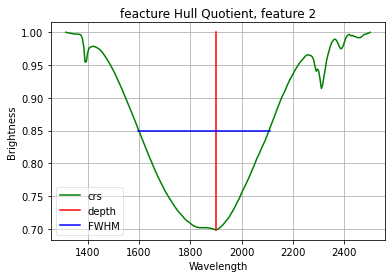

<Figure size 432x288 with 0 Axes>

In [52]:
from __future__ import print_function
%matplotlib inline
import os
import pysptools.spectro as spectro
x1=df.iloc[:,0].to_numpy().tolist()
y=df.iloc[:,2].to_numpy().tolist()

def display_convex_hull(spectrum,wavelength):
    spectrum= spectrum
    wvl=wavelength
    schq=spectro.SpectrumConvexHullQuotient(spectrum,wvl)
    dispay_name = "{0}_{1}".format("1",wavelength)
    schq.display("display_name")
display_convex_hull(y,x1)

def extract_and_display_features(spectrum,wavelength,baseline):
    spectrum=spectrum
    wvl=wavelength
    fea=spectro.FeaturesConvexHullQuotient(spectrum,wvl,baseline=baseline)
    fea.display("feacture",feature="all")
base=0.93

extract_and_display_features(y,x1,base)

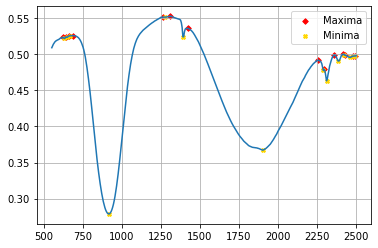

[ 620  640  660  685 1265 1310 1420 2255 2295 2360 2415 2430 2480 2490]
[ 630  650  665  915 1275 1390 1900 2290 2310 2385 2425 2460 2485 2495]
685 1265
3 4


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
y1=df.iloc[:,2].to_numpy()
d=np.asarray(y1)
wvl = df1['Sample ID'] #the wavelength must be a list
t=np.asarray(wvl)
#defining the x and y arrays
x = t
y = d
#Find peaks
peaks = find_peaks(y,height=None, threshold=None, distance=None)
#height = peaks[1]['peak_heights'] #list of the heights of the peaks
#f = interpolate.interp1d(x, y)
peak_pos = x[peaks[0]] #list of the peaks positions
right=y[peaks[0]]
#Finding the minima
y2 = y*-1
minima = find_peaks(y2)
min_pos = x[minima[0]] #list of the minima positions
min_height = y2[minima[0]] #list of the mirrored minima heights

#Plotting
fig = plt.figure()
ax = fig.subplots()
ax.plot(x,y)
ax.scatter(peak_pos,right, color = 'r', s = 15, marker = 'D', label = 'Maxima')
ax.scatter(min_pos, min_height*-1, color = 'gold', s = 15, marker = 'X', label = 'Minima')
ax.legend()
ax.grid()
plt.show()

c=d.tolist()
r=t.tolist()
CQ =sp.FeaturesConvexHullQuotient(c,r)
CQ.display("plot_name", feature='all')
print(peak_pos)
print(min_pos)
index_left=-1
index_right=0
for k in peak_pos:
    if k <1000:
        
        l=k
        index_left=index_left+1
    else:
        index_right=index_left+1
        r=k
        break
print(l,k)
print(index_left,index_right)

In [54]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


74


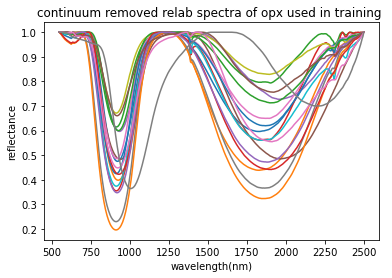

In [58]:
x1=df.iloc[:,0].to_numpy()

for i in range(1,len(df1.columns)):
    y=df1.iloc[:,i].to_numpy()
    
    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed relab spectra of opx used in training ")
    minerals.append(CR[0])
print(len(minerals))

91


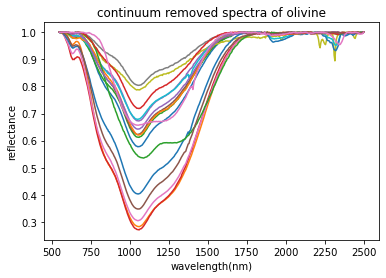

In [59]:
x2=df2.iloc[:,0].to_numpy()
for k in range(1,len(df2.columns)):
    y=df2.iloc[:,k].to_numpy()

    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of olivine")
    minerals.append(CR[0])
print(len(minerals))

102


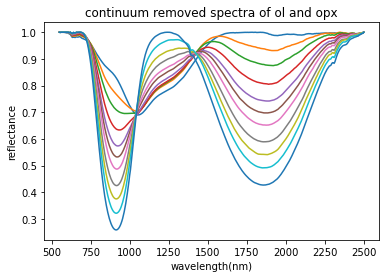

In [60]:
x4=df4.iloc[:,0].to_numpy()
for r in range(1,len(df4.columns)):
    y=df4.iloc[:,r].to_numpy()

    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ol and opx")
    minerals.append(CR[0])
print(len(minerals))

127


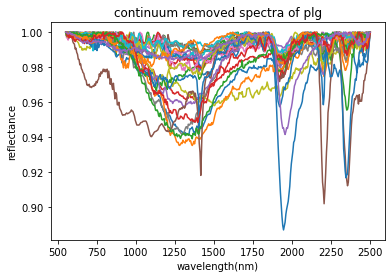

In [61]:
x5=dfp.iloc[:,0].to_numpy()
for r in range(1,len(dfp.columns)):
    y=dfp.iloc[:,r].to_numpy()

    CR = sp.convex_hull_removal(y,x5)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of plg")
    minerals.append(CR[0])
print(len(minerals))

159


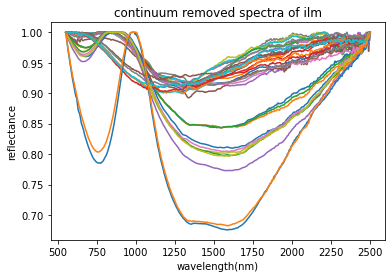

In [62]:
x6=dfl.iloc[:,0].to_numpy()
for r in range(1,len(dfl.columns)):
    y=dfl.iloc[:,r].to_numpy()

    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ilm")
    minerals.append(CR[0])
print(len(minerals))

192


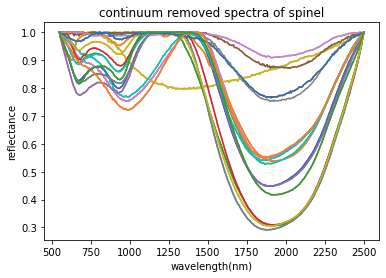

In [63]:
x7=df_sp.iloc[:,0].to_numpy()
for r in range(1,len(df_sp.columns)):
    y=df_sp.iloc[:,r].to_numpy()

    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of spinel")
    minerals.append(CR[0])
print(len(minerals))

197


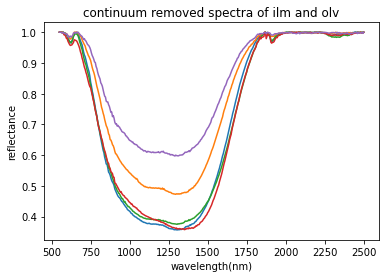

In [64]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(dfol_m.columns)):
    y=dfol_m.iloc[:,r].to_numpy()

    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ilm and olv")
    minerals.append(CR[0])
print(len(minerals))

207


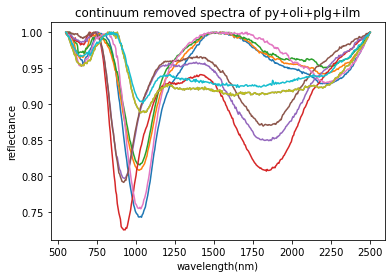

In [65]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(df2_m.columns)):
    y=df2_m.iloc[:,r].to_numpy()

    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of py+oli+plg+ilm")
    minerals.append(CR[0])
print(len(minerals))

In [41]:
# x8=df.iloc[:,0].to_numpy()
# for r in range(1,len(df3_m.columns)):
#     y=df3_m.iloc[:,r].to_numpy()

#     CR = sp.convex_hull_removal(y,x)

#     plt.plot(x,CR[0])
#     plt.xlabel("wavelength(nm)")
#     plt.ylabel("reflectance")
#     plt.title("continuum removed spectra of pyr+plg+ilm")
#     feature.append(CR[0])
# print(len(feature))

214


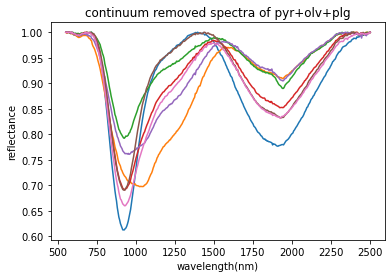

In [66]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(df4_m.columns)):
    y=df4_m.iloc[:,r].to_numpy()

    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of pyr+olv+plg")
    minerals.append(CR[0])
print(len(minerals))

218


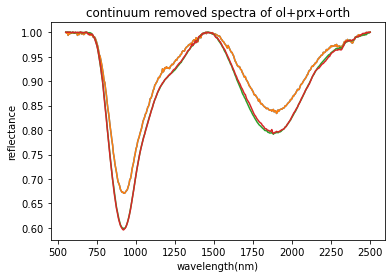

In [67]:
x8=df.iloc[:,0].to_numpy()
for r in range(1,len(df5_m.columns)):
    y=df5_m.iloc[:,r].to_numpy()

    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ol+prx+orth")
    minerals.append(CR[0])
print(len(minerals))

226


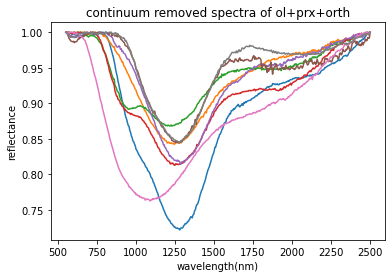

In [68]:
x8=df_pl.iloc[:,0].to_numpy()
for r in range(1,len(df_pl.columns)):
    y=df_pl.iloc[:,r].to_numpy()
    CR = sp.convex_hull_removal(y,x)
    plt.plot(x,CR[0])
    plt.xlabel("wavelength(nm)")
    plt.ylabel("reflectance")
    plt.title("continuum removed spectra of ol+prx+orth")
    minerals.append(CR[0])
print(len(minerals))

In [69]:
feature=minerals

In [73]:
np.asarray(feature).shape

(760530, 391)

In [47]:
feature=minerals

In [205]:
hyp.shape

391

AttributeError: 'float' object has no attribute 'shape'

In [74]:
x=df.iloc[:,0].to_numpy()

df_f = pd.DataFrame(np.asarray(feature[:700000]),columns=x)
df_f

,550,555,560,565,570,575,580,585,590,595,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1.000000,0.999906,1.000000,0.999953,1.000000,1.000000,1.000000,0.999746,0.999563,0.999111,...,0.990856,0.991782,0.992490,0.993887,0.995692,0.997085,0.997821,0.999856,0.998306,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999888,0.999541,0.999235,...,0.991878,0.991743,0.992583,0.994220,0.996257,0.997029,0.997183,0.998446,0.998780,1.000000
2,1.000000,0.999981,1.000000,0.999949,1.000000,1.000000,1.000000,0.999783,0.999594,0.999260,...,0.992325,0.991830,0.992462,0.994119,0.995219,0.997766,0.998372,0.998095,0.999637,1.000000
3,1.000000,0.999975,1.000000,0.999949,1.000000,1.000000,1.000000,0.999895,0.999757,0.999429,...,0.990964,0.990992,0.992856,0.994195,0.996624,0.997578,0.996823,0.998421,0.997646,1.000000
4,1.000000,1.000000,1.000000,0.999980,1.000000,1.000000,1.000000,0.999837,0.999522,0.999267,...,0.994247,0.994003,0.995137,0.996376,0.998091,0.998359,0.999054,0.999689,0.998836,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,0.998206,0.997228,0.996249,0.995270,0.994291,0.993312,0.992333,0.993014,0.993992,0.994971,...,0.975554,0.975354,0.974670,0.973986,0.973303,0.972619,0.971935,0.971251,0.970567,0.970946
699996,0.998063,0.997006,0.995949,0.994892,0.993835,0.992778,0.991721,0.992456,0.993513,0.994570,...,0.980041,0.980334,0.980184,0.980034,0.979884,0.979734,0.979584,0.979434,0.979284,0.979758
699997,0.997761,0.996539,0.995317,0.994095,0.992873,0.991651,0.990429,0.991280,0.992501,0.993723,...,0.984080,0.984198,0.984156,0.984113,0.984071,0.984029,0.983987,0.983945,0.983903,0.984240
699998,0.996906,0.995217,0.993528,0.991839,0.990150,0.988461,0.986772,0.987947,0.989636,0.991324,...,0.988046,0.988546,0.988972,0.989397,0.989822,0.990247,0.990672,0.991097,0.991522,0.991553


In [75]:
from sklearn.preprocessing import StandardScaler
x_ = StandardScaler().fit_transform(df_f)

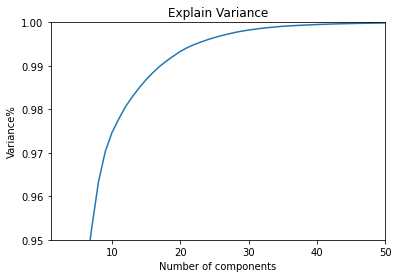

In [76]:
from sklearn.decomposition import PCA

pca=PCA()
principalComponents= pca.fit_transform(x_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance%')
plt.title('Explain Variance')
plt.xlim([1,50])
plt.ylim([0.95,1])
plt.show()

In [77]:
pca=PCA(n_components = 20)
new_data=pca.fit_transform(df_f)


In [78]:
principal_x=pd.DataFrame(new_data,columns=[f"column{i}" for i in range(20)])

In [458]:
principal_x=principal_x.to_numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [79]:
principal_x
type(principal_x)

pandas.core.frame.DataFrame

In [80]:
y=[[1,1,0,0,0,0] for i in range(0,56)]
len(y)
for j in range(56,74):
    y.append([1,0,0,0,0,0])
for k in range(74,91):
    y.append([0,0,1,0,0,0])
for l in range(91,102):
    y.append([1,0,1,0,0,0])
for l in range(102,127):
    y.append([0,0,0,1,0,0])
for l in range(127,159):
    y.append([0,0,0,0,1,0])
for l in range(159,192):
    y.append([0,0,0,0,0,1])
for l in range(192,197):
    y.append([0,0,1,0,1,0])
for l in range(197,207):
    y.append([0,0,1,1,1,0])
for l in range(207,214):
    y.append([0,0,1,1,0,0])
for l in range(214,218):
    y.append([1,0,1,0,0,0])
for l in range(218,226):
    y.append([1,0,1,0,0,0])
Y=y
len(Y)
Y=np.asarray(Y)
Y
 

array([[1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [81]:
Y.shape

(226, 6)

In [82]:
principal_x

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16,column17,column18,column19
0,1.382344,1.463780,-0.480175,2.011602,-0.301117,-0.410170,-0.080387,-0.120485,-0.007714,0.135858,-0.051488,-0.226546,0.026166,-0.009065,-0.109377,-0.297785,-0.018974,0.031994,-0.026361,0.030473
1,1.364298,1.476882,-0.489703,2.004226,-0.307531,-0.391075,-0.066165,-0.110936,-0.006155,0.146831,-0.050866,-0.222344,0.030126,-0.008996,-0.117421,-0.298301,-0.016023,0.026095,-0.027577,0.027020
2,1.111920,1.372750,-0.464231,1.810071,-0.288457,-0.336871,-0.069619,-0.093797,0.014472,0.156088,-0.048173,-0.215761,0.032716,-0.009256,-0.118278,-0.291826,-0.017281,0.021620,-0.027107,0.029540
3,0.842264,1.284712,-0.431512,1.571785,-0.280286,-0.275542,-0.074413,-0.079300,0.038901,0.161907,-0.044236,-0.204803,0.035548,-0.009422,-0.121727,-0.279876,-0.017752,0.011625,-0.026280,0.029504
4,0.695939,1.268423,-0.411953,1.466428,-0.280840,-0.240962,-0.069755,-0.067305,0.051964,0.171135,-0.043079,-0.198484,0.040150,-0.007687,-0.128179,-0.277995,-0.018688,0.006925,-0.028041,0.028394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,-0.415145,0.126751,0.269717,0.067035,-0.027876,-0.049522,0.109452,0.008381,-0.012069,-0.042828,0.044292,-0.012554,0.017952,0.023052,-0.048568,0.000776,-0.003761,0.008154,-0.013533,-0.014615
699996,-0.411024,0.139375,0.282658,0.103337,0.009224,-0.069030,0.044782,0.018400,-0.030370,-0.032836,0.034956,-0.007504,0.017639,0.010878,-0.028918,0.008043,0.010170,0.015778,-0.030630,-0.021271
699997,-0.466127,0.128229,0.268728,0.118178,0.028578,-0.069429,0.023562,0.043045,-0.049458,0.000811,0.013334,-0.002494,0.000433,-0.026313,-0.016377,0.011840,0.022931,0.023394,-0.026427,-0.029015
699998,-0.452535,0.139429,0.284547,0.145281,0.037102,-0.067288,0.022456,0.001145,-0.049624,-0.008782,-0.001106,0.018744,-0.027937,-0.030150,-0.005257,0.006959,0.030992,0.013473,-0.023155,-0.029160


In [83]:
principal_x.shape

(700000, 20)

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay


In [85]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principal_x[:226],Y,test_size=0.10,random_state=17)

In [466]:
!pip install scikit-multilearn

In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {'k': range(1,10), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'
clf = GridSearchCV(MLkNN(), parameters, scoring=score)
clf.fit(x_train, y_train)
print (clf.best_params_, clf.best_score_)

/home/nisergeo/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/nisergeo/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/nisergeo/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/nisergeo/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: 

{'k': 1, 's': 0.5} 0.8508370130664517


In [86]:
classifier = MLkNN(k=2,s=0.5)

# train
#classifier.fit(x_train_svm, y_train_svm)
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
print(predictions==y_test)
print(y_test)

[[ True  True  True  True False  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True False  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [False  True False False False  True]
 [False  True False False False  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True False  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True False  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True False  True  True  True  True]]
[[0 0 1 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [1 0 1 0 0 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 

/home/nisergeo/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [87]:
from scipy import sparse


In [74]:
predictions.todense()

matrix([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0]])

In [517]:
test_object2=[1,2,3,4,5,6,6,7,8]
test_object2[:0]

[]

In [88]:
hyp_predict=classifier.predict(principal_x[226:700000])

In [89]:
result = np.all(hyp_predict.toarray()[100:100000] == hyp_predict.toarray()[100])
if result:
    print('All Values in Array are same / equal')
else:
    print('All Values in Array are not same')

All Values in Array are not same


In [78]:
print(type(c.toarray()))

AttributeError: 'list' object has no attribute 'toarray'

In [90]:
mapping=hyp_predict.toarray()

m_class=mapping[:2]
for i in m_class:
    print(i[0])
mapping.shape

0
0


(699774, 6)

In [91]:
k=[1,2,3,4,5,6,7,8,9]
np.reshape(k,(3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [92]:
import seaborn as sn

In [279]:
fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

In [81]:
print(R)
np.asarray(R).shape
print(datacube[:,:,5].shape)
c.todense()[0]

NameError: name 'R' is not defined

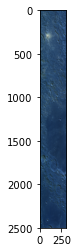

In [90]:
image=open_image(headerFileAddress)
view=imshow(image)

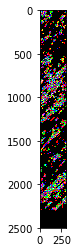

In [91]:
cview = imshow(classes=R)


In [147]:
j=-1
i=-1
k=0
index=0
count=0
ortho=[]
R3=np.zeros((2501,304))
for div in mapping:
    k=k+1
    if j==-1:
        i=i+1
    if (div[index] ==1):
        R3[i][j]=1
        ortho.append(k)
        count=count+1
        j=j+1
        if j==304:
            j=-1
    
    if (div[index] !=1):
        R3[i][j]=0
        j=j+1
        if j==304:
            j=-1
            
print(R)

[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [578]:
print(ortho[:10])

[4, 6, 28, 29, 30, 54, 78, 124, 125, 126]


In [94]:
print(R.shape)

(2501, 304)


In [261]:
print(count/k)

0.28809587095262185


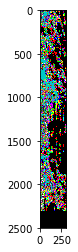

In [257]:
cview = imshow(classes=R2)


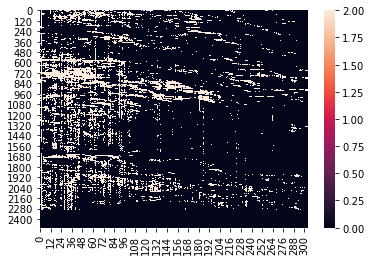

In [258]:
hm = sn.heatmap(data=R)

In [284]:
!pip install colorspacious

In [95]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1

In [97]:
data = datacube[:,:,5]

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [146]:
R.all()==R3.all()

True

<Figure size 3600x7200 with 0 Axes>

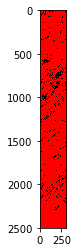

In [152]:
from matplotlib.pyplot import figure

plt.figure(figsize=(50,100))
fig, ax = plt.subplots()
x=R3
# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(x, interpolation='none', cmap=cmap, norm=norm)


In [97]:
label = [0,1]
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
cmap = mpl.colors.ListedColormap(['r', 'k'])
ax.imshow(R, interpolation='none', cmap=cmap, norm=norm)


NameError: name 'mpl' is not defined

<Figure size 576x576 with 0 Axes>

In [87]:
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)


In [88]:
im1 = grid[1].imshow(R, cmap='gray', interpolation='nearest')
grid.cbar_axes[1].colorbar(im1)
plt.savefig('/home/nisergeo/Desktop/Data/plot.png', bbox_inches='tight', pad_inches=0.0, dpi=200,)

<ipython-input-88-7e9fe1006eec>:2: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[1].colorbar(im1)
/home/nisergeo/anaconda3/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


<Figure size 432x288 with 0 Axes>

#### from matplotlib.colors import LogNorm

from   mpl_toolkits.axes_grid1 import AxesGrid
label = [0,4]
colors = ['red','green']
fig = plt.figure(figsize=(20,120))

grid = AxesGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0.0, share_all=True, \
            label_mode="L", cbar_mode="each", cbar_size='6%')

np.random.seed(123)
A = R
image = grid[0].imshow(np.rot90(A),
                     cmap=matplotlib.colors.ListedColormap(colors))

plt.colorbar(image, cax=grid.cbar_axes[0])

plt.show()

In [153]:
R3==R2

array([[ True,  True, False, ..., False, False,  True],
       [ True, False,  True, ..., False,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

ValueError: 'Blue' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'sauron', 'sauron_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

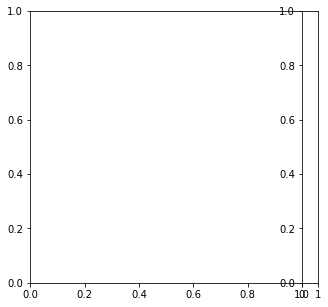

In [119]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from   mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np


fig = plt.figure(figsize=(15,5))    #This determines the size of the figure
grid = AxesGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0.0, share_all=True, \
            label_mode="L", cbar_location="right", cbar_mode="each", cbar_size='6%')

A = R2
image = grid[0].imshow(np.rot90(A), cmap='Blue', interpolation=None)

plt.colorbar(image, cax=grid.cbar_axes[0])

plt.show()

In [101]:
!pip install plotbin

  Preparing metadata (setup.py) ... done
  Created wheel for plotbin: filename=plotbin-3.1.3-py3-none-any.whl size=12841 sha256=72fe13641ad0933dad5600c502e5631b3d8353141101f466eaa9d472d741fcd0
  Stored in directory: /home/nisergeo/.cache/pip/wheels/d1/91/2d/c25b1112c8e17c13a6a76676ce13f88bfcd1a7423259b04a5b
Successfully built plotbin


In [1]:
gt = open_image(headerFileAddress).read_band(80)
im = datacube[:,:,5]
mask = R.T

# note that the mask is inverted (~) to show color where mask equals true
im_ma = np.ma.array(im, mask=~mask)

# some default keywords for imshow
kwargs = {'interpolation': 'none', 'vmin': im.min(), 'vmax': im.max()}
fig, ax = plt.subplots(1,3, figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

ax[0].set_title('"Original" data')
ax[0].imshow(im, cmap=plt.cm.Greys_r, **kwargs)

ax[1].set_title('Mask')
ax[1].imshow(mask, cmap=plt.cm.binary, interpolation='none')

ax[2].set_title('Masked data in color (jet)')
ax[2].imshow(im, cmap=plt.cm.Greys_r, **kwargs)
ax[2].imshow(im_ma, cmap=plt.cm.jet, **kwargs)

NameError: name 'open_image' is not defined

In [471]:
from sklearn import metrics
y_expect=y_test
y_pred=predictions
print(metrics.classification_report(y_expect,y_pred))
classifier.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.67      0.40      0.50         5
           2       1.00      0.75      0.86         8
           3       1.00      0.60      0.75         5
           4       1.00      0.40      0.57         5
           5       1.00      1.00      1.00         3

   micro avg       0.89      0.71      0.79        35
   macro avg       0.91      0.69      0.76        35
weighted avg       0.91      0.71      0.77        35
 samples avg       0.89      0.83      0.84        35



0.6956521739130435

In [211]:
import numpy as np
from scipy import sparse
Y=sparse.csr_matrix(Y)

In [232]:
from sklearn.model_selection import GridSearchCV
parameters = {'k': range(1,10), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'
clf = GridSearchCV(MLkNN(), parameters, scoring=score)
clf.fit(x_train, y_train)
print (clf.best_params_, clf.best_score_)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\admin\appdata\local\programs\pytho

{'k': 1, 's': 0.5} 0.8505621378777836


In [237]:
classifier = MLkNN(k=1,s=0.5)

# train
#classifier.fit(x_train_svm, y_train_svm)
classifier.fit(principal_x, Y)
# predict
predictions = classifier.predict(x_test)
from sklearn import metrics
y_expect=y_test
y_pred=predictions

classifier.score(x_test,y_test)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


1.0

In [236]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principal_x,Y,test_size=0.10,random_state=17)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(principal_x, Y, test_size=0.2, random_state=42)


In [100]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train_rf, y_train_rf)
y_hat=clf.predict(x_test_rf)
print(metrics.classification_report(y_test_rf,y_rf))
clf.score(x_test_rf,y_test_rf)

ValueError: Unknown label type: 'unknown'

In [ ]:
# from sklearn.model_selection import KFold
# kf=KFold(n_splits=15)
# kf.get_n_splits(principal_x)

In [ ]:
# def get_score(model,X_train,X_test,y_train,y_test):
#     model.fit(X_train,y_train)
#     return model.score(X_test,y_test)

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# folds=StratifiedKFold(n_splits=3)


In [ ]:
#scores_k=[]
# scores_s=[]
# scores_rf=[]
# for train_index, test_index in kf.split(principal_x):
#     X_train_kf,X_test_kf,y_train_kf,y_test_kf=principal_x[train_index],principal_x[test_index],Y[train_index],Y[test_index]
#     scores_k.append(get_score(MLkNN(k=2,s=0.5),X_train_kf,X_test_kf,y_train_kf,y_test_kf))
#     scores_s.append(get_score(MultiOutputClassifier(LinearSVC(random_state=42), n_jobs=-1),X_train_kf,X_test_kf,y_train_kf,y_test_kf))
#     scores_rf.append(get_score(RandomForestClassifier(max_depth=2, random_state=0),X_train_kf,X_test_kf,y_train_kf,y_test_kf))

In [ ]:
# print(np.average(scores_k))

# print(np.average(scores_s))
# print(np.average(scores_rf))

In [ ]:
!pip install skmultilearn


In [103]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principal_x,Y,test_size=0.10,random_state=17)

In [104]:
from sklearn.model_selection import GridSearchCV
parameters = {'k': range(1,10), 's': [0.5, 0.7, 1.0]}
score = 'f1_macro'
clf = GridSearchCV(MLkNN(), parameters, scoring=score)
clf.fit(x_train_svm, y_train_svm)
print (clf.best_params_, clf.best_score_)

ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

In [ ]:
classifier = MLkNN(k=1,s=0.5)

# train
#classifier.fit(x_train_svm, y_train_svm)
classifier.fit(principal_x[:226], Y[:226])
# predict
predictions = classifier.predict(x_test_svm)


In [ ]:
from sklearn import metrics
y_expect=y_test_svm
y_pred=predictions
print(metrics.classification_report(y_expect,y_pred))
classifier.score(x_test_svm,y_test_svm)

In [ ]:
print(classifier.predict(principal_x[224:229]).todense())
print(Y[224:229])

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import  OneVsRestClassifier

In [ ]:
base_learners=[('rf_1',MultiOutputClassifier(SVC(kernel="rbf",random_state=42), n_jobs=-1)),('rf_2',MLkNN(k=1,s=0.5))]
clf_s=StackingClassifier(estimators=base_learners,final_estimator=MLkNN())

In [ ]:
x_train_svm.shape

In [ ]:
ovr_model=OneVsRestClassifier(clf_s)
ovr_model.fit(x_train_svm, y_train_svm)
ovr_model.score(x_test_svm,y_test_svm.reshape(-1,5))